In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_loan_rem = pd.read_csv("results/loan_remaining_time.csv")
df_loan_tim = pd.read_csv("results/loan_next_timstamp.csv")
df_loan_act = pd.read_csv("results/loan_next_act.csv")
df_order_rem = pd.read_csv("results/order_remaining_time.csv")
df_order_tim = pd.read_csv("results/order_next_timestamp.csv")
df_order_act = pd.read_csv("results/order_next_act.csv")

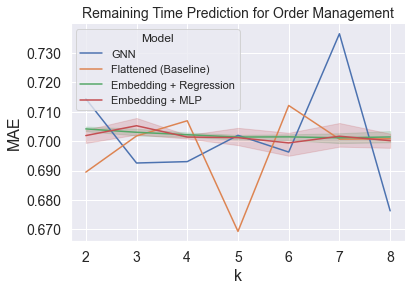

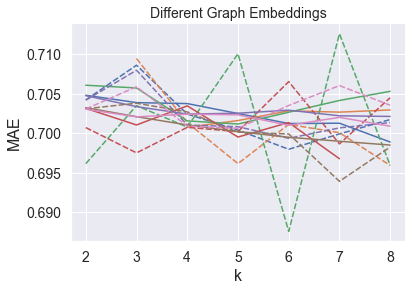

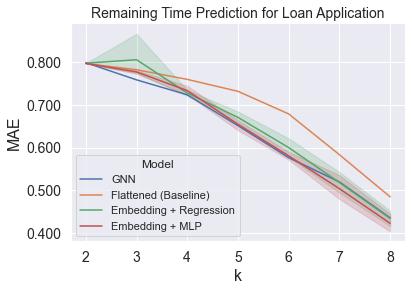

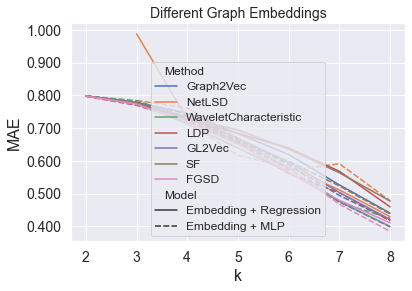

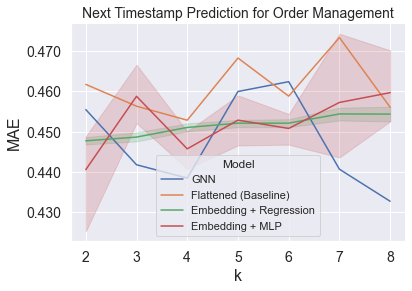

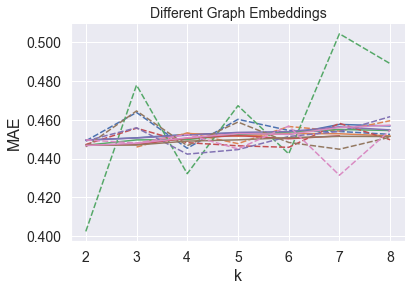

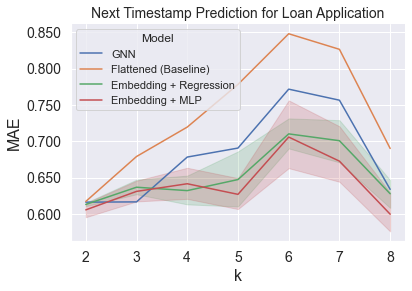

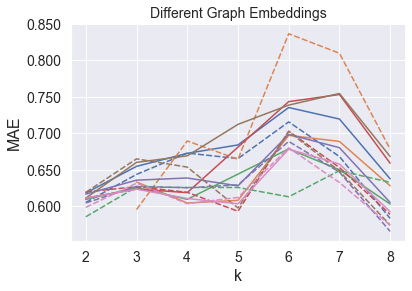

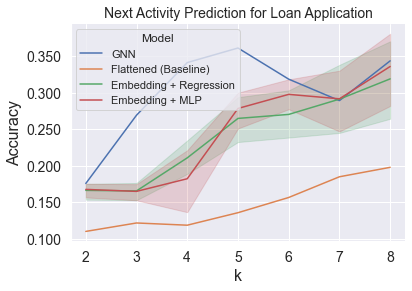

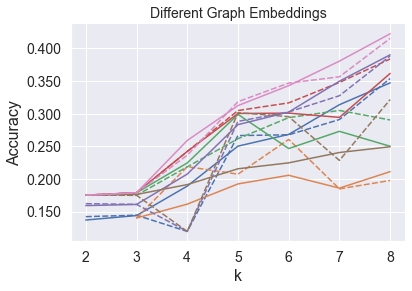

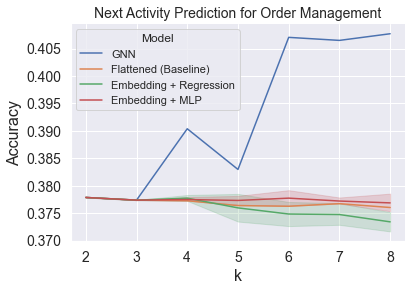

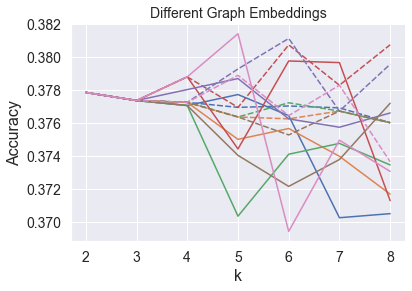

<Figure size 432x288 with 0 Axes>

In [11]:
rel_value_df_list = []
for df, performance, target, log in [(df_order_rem, "MAE", "Remaining Time", "Order Management"),
                                     (df_loan_rem, "MAE", "Remaining Time", "Loan Application"),
                                     (df_order_tim, "MAE", "Next Timestamp", "Order Management"),
                                     (df_loan_tim, "MAE", "Next Timestamp", "Loan Application"),
                                    (df_loan_act, "Accuracy", "Next Activity", "Loan Application"),
                                    (df_order_act, "Accuracy", "Next Activity", "Order Management")]:
    cols = df.columns.to_list()[1:]
    #print(cols)
    gnn_cols = [c for c in cols if "graph_gnn" in c]
    #print(gnn_cols)
    flat_cols = [c for c in cols if "flat_gnn" in c]
    #print(flat_cols)
    g2v_reg_cols = [c for c in cols if "reg_Graph2Vec" in c]
    #print(g2v_reg_cols)
    g2v_nn_cols = [c for c in cols if "nn_Graph2Vec" in c]
    #print(g2v_nn_cols)
    lsd_reg_cols = [c for c in cols if "reg_NetLSD" in c]
    #print(lsd_reg_cols)
    lsd_nn_cols = [c for c in cols if "nn_NetLSD" in c]
    #print(lsd_nn_cols)
    wav_reg_cols = [c for c in cols if "reg_WaveletCharacteristi" in c]
    #print(wav_reg_cols)
    wav_nn_cols = [c for c in cols if "nn_WaveletCharacteristi" in c]
    #print(wav_nn_cols)
    ldp_reg_cols = [c for c in cols if "reg_LDP" in c]
    #print(ldp_reg_cols)
    ldp_nn_cols = [c for c in cols if "nn_LDP" in c]
    #print(ldp_nn_cols)
    gl_reg_cols = [c for c in cols if "reg_GL2Vec" in c]
    #print(gl_reg_cols)
    gl_nn_cols = [c for c in cols if "nn_GL2Vec" in c]
    #print(gl_nn_cols)
    sf_reg_cols = [c for c in cols if "reg_SF" in c]
    #print(sf_reg_cols)
    sf_nn_cols = [c for c in cols if "nn_SF" in c]
    #print(sf_nn_cols)
    fgsd_reg_cols = [c for c in cols if "reg_FGSD" in c]
    #print(fgsd_reg_cols)
    fgsd_nn_cols = [c for c in cols if "nn_FGSD" in c]
    #print(fgsd_nn_cols)
    #print(df["event_remaining_timegraph_gnn_k_2"].iloc[3])
    gnn_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gnn_cols],
        "Performance": [df[c].iloc[3] for c in gnn_cols],
        "Method":["Graph Neural Network" for c in gnn_cols],
        "Model":["GNN" for c in flat_cols]})
    #print(gnn_df)
    flat_df = pd.DataFrame({
        "k":[int(c[-1]) for c in flat_cols],
        "Performance": [df[c].iloc[3] for c in flat_cols],
        "Method":["Flattened (Baseline)" for c in flat_cols],
        "Model":["Flattened (Baseline)" for c in flat_cols]})
    #print(flat_df)
    g2v_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in g2v_reg_cols],
        "Performance": [df[c].iloc[3] for c in g2v_reg_cols],
        "Method":["Graph2Vec" for c in g2v_reg_cols],
    "Model":["Embedding + Regression" for c in g2v_reg_cols]})
    #print(g2v_r_df)
    g2v_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in g2v_nn_cols],
        "Performance": [df[c].iloc[3] for c in g2v_nn_cols],
        "Method":["Graph2Vec" for c in g2v_nn_cols],
    "Model":["Embedding + MLP" for c in g2v_nn_cols]})
    #print(g2v_n_df)
    lsd_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in lsd_reg_cols],
        "Performance": [df[c].iloc[3] for c in lsd_reg_cols],
        "Method":["NetLSD" for c in lsd_reg_cols],
    "Model":["Embedding + Regression" for c in lsd_reg_cols]})
    #print(lsd_r_df)
    lsd_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in lsd_nn_cols],
        "Performance": [df[c].iloc[3] for c in lsd_nn_cols],
        "Method":["NetLSD" for c in lsd_nn_cols],
    "Model":["Embedding + MLP" for c in lsd_nn_cols]})
    #print(lsd_n_df)
    wav_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in wav_reg_cols],
        "Performance": [df[c].iloc[3] for c in wav_reg_cols],
        "Method":["WaveletCharacteristic" for c in wav_reg_cols],
    "Model":["Embedding + Regression" for c in wav_reg_cols]})
    #print(wav_r_df)
    wav_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in wav_nn_cols],
        "Performance": [df[c].iloc[3] for c in wav_nn_cols],
        "Method":["WaveletCharacteristic" for c in wav_nn_cols],
    "Model":["Embedding + MLP" for c in wav_nn_cols]})
    #print(wav_n_df)
    ldp_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in ldp_reg_cols],
        "Performance": [df[c].iloc[3] for c in ldp_reg_cols],
        "Method":["LDP" for c in ldp_reg_cols],
    "Model":["Embedding + Regression" for c in ldp_reg_cols]})
    #print(ldp_r_df)
    ldp_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in ldp_nn_cols],
        "Performance": [df[c].iloc[3] for c in ldp_nn_cols],
        "Method":["LDP" for c in ldp_nn_cols],
    "Model":["Embedding + MLP" for c in ldp_nn_cols]})
    #print(ldp_n_df)
    gl_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gl_reg_cols],
        "Performance": [df[c].iloc[3] for c in gl_reg_cols],
        "Method":["GL2Vec" for c in gl_reg_cols],
    "Model":["Embedding + Regression" for c in gl_reg_cols]})
    #print(gl_r_df)
    gl_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in gl_nn_cols],
        "Performance": [df[c].iloc[3] for c in gl_nn_cols],
        "Method":["GL2Vec" for c in gl_nn_cols],
    "Model":["Embedding + MLP" for c in gl_nn_cols]})
    #print(gl_n_df)
    sf_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in sf_reg_cols],
        "Performance": [df[c].iloc[3] for c in sf_reg_cols],
        "Method":["SF" for c in sf_reg_cols],
    "Model":["Embedding + Regression" for c in sf_reg_cols]})
    #print(sf_r_df)
    sf_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in sf_nn_cols],
        "Performance": [df[c].iloc[3] for c in sf_nn_cols],
        "Method":["SF" for c in sf_nn_cols],
    "Model":["Embedding + MLP" for c in sf_nn_cols]})
    #print(sf_n_df)
    fgsd_r_df = pd.DataFrame({
        "k":[int(c[-1]) for c in fgsd_reg_cols],
        "Performance": [df[c].iloc[3] for c in fgsd_reg_cols],
        "Method":["FGSD" for c in fgsd_reg_cols],
    "Model":["Embedding + Regression" for c in fgsd_reg_cols]})
    #print(fgsd_r_df)
    fgsd_n_df = pd.DataFrame({
        "k":[int(c[-1]) for c in fgsd_nn_cols],
        "Performance": [df[c].iloc[3] for c in fgsd_nn_cols],
        "Method":["FGSD" for c in fgsd_nn_cols],
    "Model":["Embedding + MLP" for c in fgsd_nn_cols]})

    #print(fgsd_n_df)
    value_df = pd.concat([gnn_df,flat_df,g2v_r_df,g2v_n_df,lsd_r_df,lsd_n_df,wav_r_df,wav_n_df,ldp_r_df,ldp_n_df,gl_r_df,gl_n_df,sf_r_df,sf_n_df,fgsd_r_df,fgsd_n_df ], ignore_index = True)
    if target == "Remaining Time" and log == "Order Management":
        value_df["Performance"] = value_df["Performance"].apply(lambda x: np.NaN if x>0.8 else x)
    if target == "Remaining Time":
        value_df["Performance"] = value_df["Performance"].apply(lambda x: np.NaN if x>1 else x)
    if target == "Next Timestamp":
        value_df["Performance"] = value_df["Performance"].apply(lambda x: np.NaN if x>1 else x)
    #if target == "Next Activity":
    #    value_df= value_df[value_df["Model"]!= "Embedding + Regression"] 
    #    print(value_df)
    value_df = value_df.rename(columns={"Performance":performance})
    sns.set(font_scale=1)
    ax = sns.lineplot(x="k",y=performance, data = value_df, hue = "Model")
    ax.set_title(target+ " Prediction for "+log,size="14")
    ax.set_yticklabels( ['{:,.3f}'.format(x) for x in ax.get_yticks()], size = 14)
    ax.set_xticklabels([int (x) for x in ax.get_xticks()], size = 14)
    ax.set_xlabel(ax.get_xlabel(), size = 16)
    ax.set_ylabel(ax.get_ylabel(), size = 16)
    sns.despine(ax=ax)
    plt.savefig("results/"+log+target+"_overview.png",dpi=600,bbox_inches='tight')
    plt.show()
    plt.clf()
    ax = sns.lineplot(x="k",y=performance, data = value_df[value_df["Method"].apply(lambda x: x!="Graph Neural Network" and x!="Flattened (Baseline)")],hue="Method",style = "Model", legend = "full" if target == "Remaining Time" and log == "Loan Application" else False )
    ax.set_title("Different Graph Embeddings",size="14")
    sns.despine(ax=ax)
    ax.set_yticklabels( ['{:,.3f}'.format(x) for x in ax.get_yticks()], size = 14)
    ax.set_xticklabels([int (x) for x in ax.get_xticks()], size = 14)
    ax.set_xlabel(ax.get_xlabel(), size = 16)
    ax.set_ylabel(ax.get_ylabel(), size = 16)
    #plt.legend( bbox_to_anchor=(1, 1))
    plt.savefig("results/"+log+target+"_embeddings.png",dpi=600,bbox_inches='tight')
    plt.show()
    plt.clf()
    for em_tec in value_df["Method"].unique():
        if  em_tec== "Flattened (Baseline)" or log != "Loan Application":
            continue
        for c_k in range(2,9):
            #print(value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)& (value_df["Model"]=="Embedding + Regression")])
            if not em_tec == "Graph Neural Network":
                reg_dif = 0
                mlp_dif = 0
                if performance == "MAE":
                    reg_dif = (value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]- value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)& (value_df["Model"]=="Embedding + Regression")][performance].iloc[0]) / value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                else:
                    reg_dif = (value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)& (value_df["Model"]=="Embedding + Regression")][performance].iloc[0]-value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]) / value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                if performance == "MAE":
                    mlp_dif = (value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]- value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)& (value_df["Model"]=="Embedding + MLP")][performance].iloc[0]) /value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                else:
                    mlp_dif = (value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)& (value_df["Model"]=="Embedding + MLP")][performance].iloc[0]-value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0])/value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                rel_value_df_list.append({"Embedding":em_tec,"k":c_k,"Model":"MLP","Delta":mlp_dif*100})
                rel_value_df_list.append({"Embedding":em_tec,"k":c_k,"Model":"Regression","Delta":reg_dif*100})
            else:
                if performance == "MAE":
                    reg_dif = (value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]- value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)][performance].iloc[0]) / value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                else:
                    reg_dif = (value_df[(value_df["Method"]==em_tec) & (value_df["k"]==c_k)][performance].iloc[0]-value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]) / value_df[(value_df["Method"]=="Flattened (Baseline)") & (value_df["k"]==c_k)][performance].iloc[0]
                rel_value_df_list.append({"Embedding":em_tec,"k":c_k,"Model":"GNN","Delta":reg_dif*100})
    



In [4]:
rel_value_df = pd.DataFrame(rel_value_df_list)
rel_value_df

,Embedding,k,Model,Delta
0,Graph Neural Network,2,GNN,-0.270043
1,Graph Neural Network,3,GNN,3.031889
2,Graph Neural Network,4,GNN,4.760498
3,Graph Neural Network,5,GNN,10.991568
4,Graph Neural Network,6,GNN,15.105850
...,...,...,...,...
310,FGSD,6,Regression,119.239169
311,FGSD,7,MLP,92.932132
312,FGSD,7,Regression,105.934934
313,FGSD,8,MLP,110.059313


<ipython-input-5-165d3aa18299>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="k", y="Delta", hue="Embedding", data=rel_value_df, ci=None, ax=axs[0])


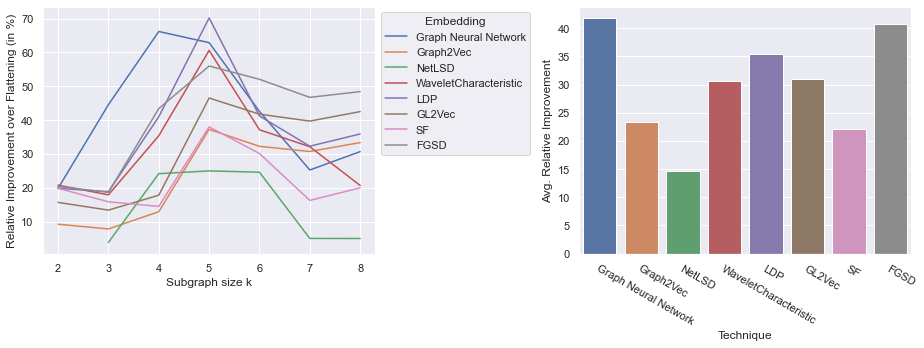

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

# First plot
sns.lineplot(x="k", y="Delta", hue="Embedding", data=rel_value_df, ci=None, ax=axs[0])
axs[0].set_xlabel("Subgraph size k", fontsize=12)
axs[0].set_ylabel("Relative Improvement over Flattening (in %)", fontsize=12)
sns.move_legend(axs[0], "upper left", bbox_to_anchor=(1, 1))

# Second plot
embedd_vals = rel_value_df["Embedding"].unique()
em_val_dict = [{"Technique": e_v, "Avg. Relative Improvement": rel_value_df[(rel_value_df["Embedding"] == e_v)]["Delta"].mean()} for e_v in embedd_vals]
sns.barplot(x="Technique", y="Avg. Relative Improvement", data=pd.DataFrame(em_val_dict), ax=axs[1])
plt.xticks(rotation=-30, rotation_mode='anchor', ha='left')

plt.tight_layout()
plt.savefig("results/"+"embedding_comparison_relative_with_GNN_with_average.png",dpi=600)
plt.show()

In [6]:
print(rel_value_df[(rel_value_df["Embedding"]=="Graph Neural Network")]["Delta"].mean())
print(rel_value_df[(rel_value_df["Embedding"]=="FGSD")]["Delta"].mean())

41.72680881154967
40.818833834088636


In [7]:
def gen_results_only_na(df,model_string):
    print(model_string)
    rel_dicts =[]
    df = df[[c for c in df.columns if model_string in c]]
    
    df_na = df[[c for c in df.columns if "activity" in c]]
    df_na = df_na.iloc[[3]]
    res_dicts = []
    no_add = False
    dicts_to_add = []
    for k in range(2,9):
        sub_df = df_na[[c for c in df_na.columns if str(k) in c]]
        #print(sub_df)
        #print(sub_df.columns)
        baseline = [c for c in sub_df.columns if "baseline" in c][0]
        manual = [c for c in sub_df.columns if model_string+"_manual_" in c][0]
        delta = [c for c in sub_df.columns if model_string+"_delta" in c][0]
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][baseline],"type":"baseline"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][manual]-sub_df.loc[3][baseline],"type":"manual"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][delta]-sub_df.loc[3][baseline],"type":"delta"})
        res_dicts.append({"k":k,"Relative":((sub_df.loc[3][delta]-sub_df.loc[3][manual])/sub_df.loc[3][manual])*100})
        if sub_df.loc[3][manual]-sub_df.loc[3][baseline]<=0.001 or sub_df.loc[3][delta]-sub_df.loc[3][baseline] <= 0.001:
            print("skip")
            no_add = True
        #if model_string != "reg" and model_string != "nn_8_6":
        dicts_to_add.append({"k":k,"Target":"Next Activity","Embedding":"Features + FGSD" if "FGSD" in model_string else "GL2Vec", "Relative":((sub_df.loc[3][delta]-sub_df.loc[3][manual])/sub_df.loc[3][manual])*100,"target":"next_activity"})
        #print(sub_df)
    if not no_add:
        [rel_dicts.append(d) for d in dicts_to_add]
    res_df = pd.DataFrame(res_dicts)
    print("Next Activity")
    ax = sns.lineplot(x="k",y= "performance", data = res_df, hue="type")
    plt.show()
    return rel_dicts
def gen_results_rt_nt(df,model_string):
    print(model_string)
    rel_dicts =[]
    df = df[[c for c in df.columns if model_string in c]]
    df_rt = df[[c for c in df.columns if "remaining" in c]]
    df_rt = df_rt.iloc[[3]]
    res_dicts = []
    no_add = False
    dicts_to_add = []
    for k in range(2,9):
        sub_df = df_rt[[c for c in df_rt.columns if str(k) in c]]
        baseline = [c for c in sub_df.columns if "baseline" in c][0]
        manual = [c for c in sub_df.columns if model_string+"_manual_" in c][0]
        delta = [c for c in sub_df.columns if model_string+"_delta" in c][0]
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][baseline],"type":"baseline"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][manual],"type":"manual"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][delta],"type":"delta"})
        res_dicts.append({"k":k,"Relative":((sub_df.loc[3][manual]-sub_df.loc[3][delta])/sub_df.loc[3][manual])*100})
        #if model_string != "nn":
        if sub_df.loc[3][manual]-sub_df.loc[3][baseline]>=-0.001 or sub_df.loc[3][delta]-sub_df.loc[3][baseline] >= -0.001:
            print("skip")
        dicts_to_add.append({"k":k,"Target":"Remaining Time","Embedding":"Features + FGSD" if "FGSD" in model_string else "GL2Vec", "Relative":((sub_df.loc[3][manual]-sub_df.loc[3][delta])/sub_df.loc[3][manual])*100,"target":"remaining_time"})
        #print(sub_df)
    if not no_add:
        [rel_dicts.append(d) for d in dicts_to_add]
    res_df = pd.DataFrame(res_dicts)
    res_df = pd.DataFrame(res_dicts)
    print("Remaining Time")
    ax = sns.lineplot(x="k",y= "performance", data = res_df, hue="type")
    plt.show()
    
    
    df_nt = df[[c for c in df.columns if "timestamp" in c]]
    df_nt = df_nt.iloc[[3]]
    res_dicts = []
    no_add = False
    dicts_to_add = []
    for k in range(2,9):
        sub_df = df_nt[[c for c in df_nt.columns if str(k) in c]]
        baseline = [c for c in sub_df.columns if "baseline" in c][0]
        manual = [c for c in sub_df.columns if model_string+"_manual_" in c][0]
        delta = [c for c in sub_df.columns if model_string+"_delta" in c][0]
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][baseline],"type":"baseline"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][manual],"type":"manual"})
        res_dicts.append({"k":k,"performance":sub_df.loc[3][baseline]-sub_df.loc[3][delta],"type":"delta"})
        res_dicts.append({"k":k,"Relative":((sub_df.loc[3][manual]-sub_df.loc[3][delta])/sub_df.loc[3][manual])*100})
        if sub_df.loc[3][manual]-sub_df.loc[3][baseline]>=-0.001 or sub_df.loc[3][delta]-sub_df.loc[3][baseline] >= -0.001:
            print("skip")
        dicts_to_add.append({"k":k,"Target":"Next Timestamp","Embedding":"Features + FGSD" if "FGSD" in model_string else "GL2Vec", "Relative":((sub_df.loc[3][manual]-sub_df.loc[3][delta])/sub_df.loc[3][manual])*100,"target":"remaining_time"})
        #print(sub_df)
    if not no_add:
        [rel_dicts.append(d) for d in dicts_to_add]
    res_df = pd.DataFrame(res_dicts)
    print("Next Timestamp")
    ax = sns.lineplot(x="k",y= "performance", data = res_df, hue="type")
    plt.show()
    return rel_dicts

reg_FGSD
Remaining Time


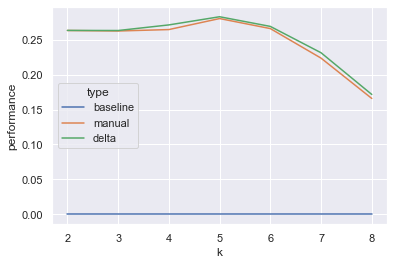

Next Timestamp


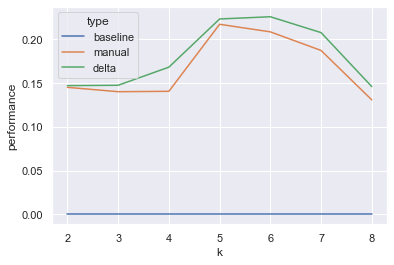

nn_20_FGSD
Remaining Time


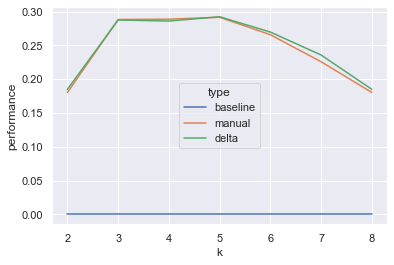

Next Timestamp


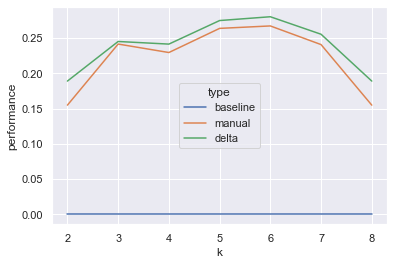

nn_20_10_FGSD
Remaining Time


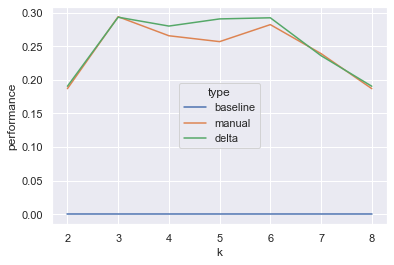

Next Timestamp


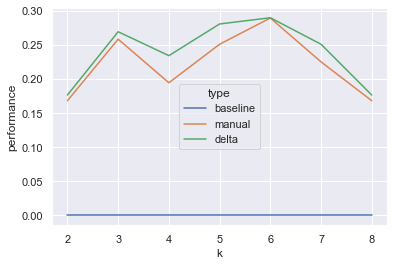

nn_18_9_FGSD
Remaining Time


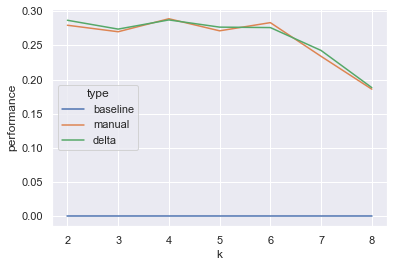

Next Timestamp


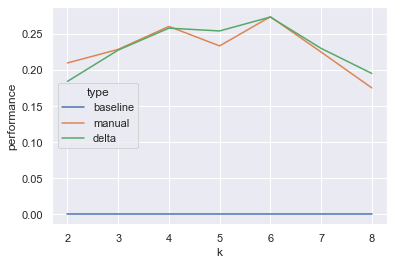

nn_18_FGSD
Remaining Time


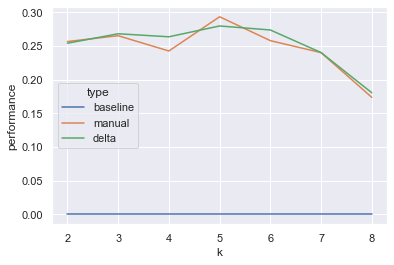

Next Timestamp


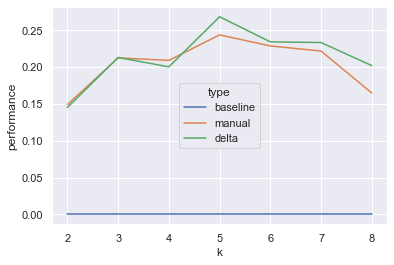

nn_16_8_FGSD
Remaining Time


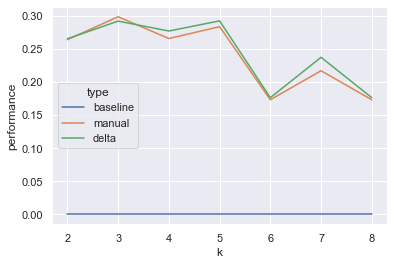

skip
Next Timestamp


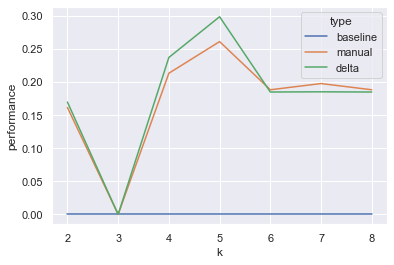

nn_16_FGSD
Remaining Time


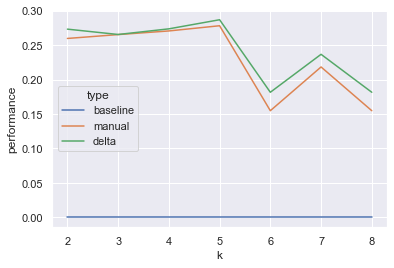

Next Timestamp


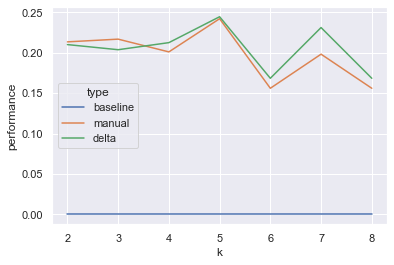

reg_FGSD
Next Activity


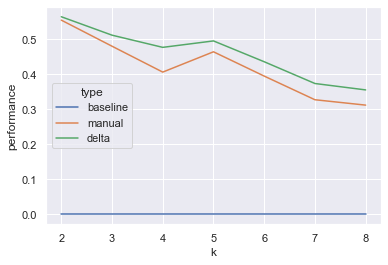

nn_20_FGSD
Next Activity


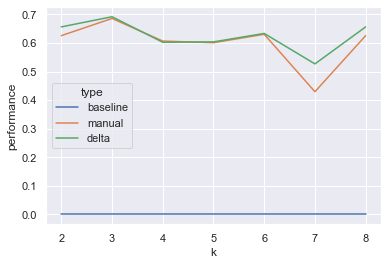

nn_20_10_FGSD
Next Activity


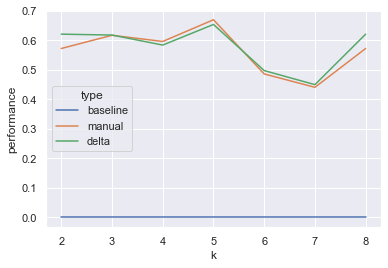

nn_18_9_FGSD
Next Activity


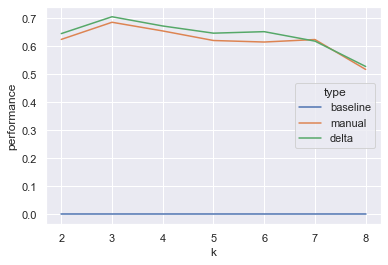

nn_18_FGSD
Next Activity


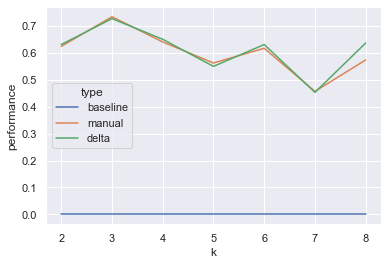

nn_16_8_FGSD
Next Activity


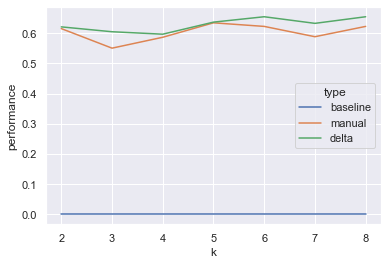

nn_16_FGSD
Next Activity


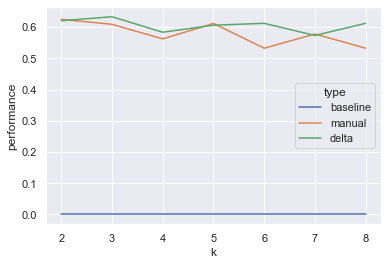

In [8]:
df_loan_delta_rtnt= pd.read_csv("results/delta_loan_rtnt.csv")
rel_dicts = []
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"reg_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_20_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_20_10_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_18_9_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_18_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_16_8_FGSD")
rel_dicts+=gen_results_rt_nt(df_loan_delta_rtnt,"nn_16_FGSD")
df_loan_delta_na = pd.read_csv("results/delta_loan_na.csv")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"reg_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_20_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_20_10_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_18_9_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_18_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_16_8_FGSD")
rel_dicts+=gen_results_only_na(df_loan_delta_na,"nn_16_FGSD")

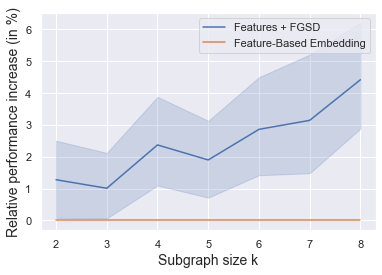

In [9]:
res_rel = pd.DataFrame(rel_dicts)
ax = sns.lineplot(x="k",y= "Relative", hue= "Embedding",data = res_rel[res_rel["Embedding"]=="Features + FGSD"])
ax = sns.lineplot(x=[2,8],y= [0,0],label="Feature-Based Embedding", errorbar = None,ax = ax)
ax.set_xlabel("Subgraph size k",fontsize=14)
ax.set_ylabel("Relative performance increase (in %)",fontsize=14)
plt.savefig("results/delta.png",dpi=600)

In [10]:
print(res_rel[res_rel["Embedding"]=="Features + FGSD"]["Relative"].mean())
only_fgsd = res_rel[res_rel["Embedding"]=="Features + FGSD"]
print(only_fgsd[only_fgsd["k"]==8]["Relative"].mean())

2.425283507935995
4.417735728069216
